In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#carregando dados
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [ ]:
#analise exploratoria dos dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [ ]:
print(df.describe(include=[int, float]))

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [ ]:
print(df.describe(include=[object]))

       InvoiceNo StockCode                         Description  \
count     541909    541909                              540455   
unique     25900      4070                                4223   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq        1114      2313                                2369   

             InvoiceDate         Country  
count             541909          541909  
unique             23260              38  
top     10/31/2011 14:41  United Kingdom  
freq                1114          495478  


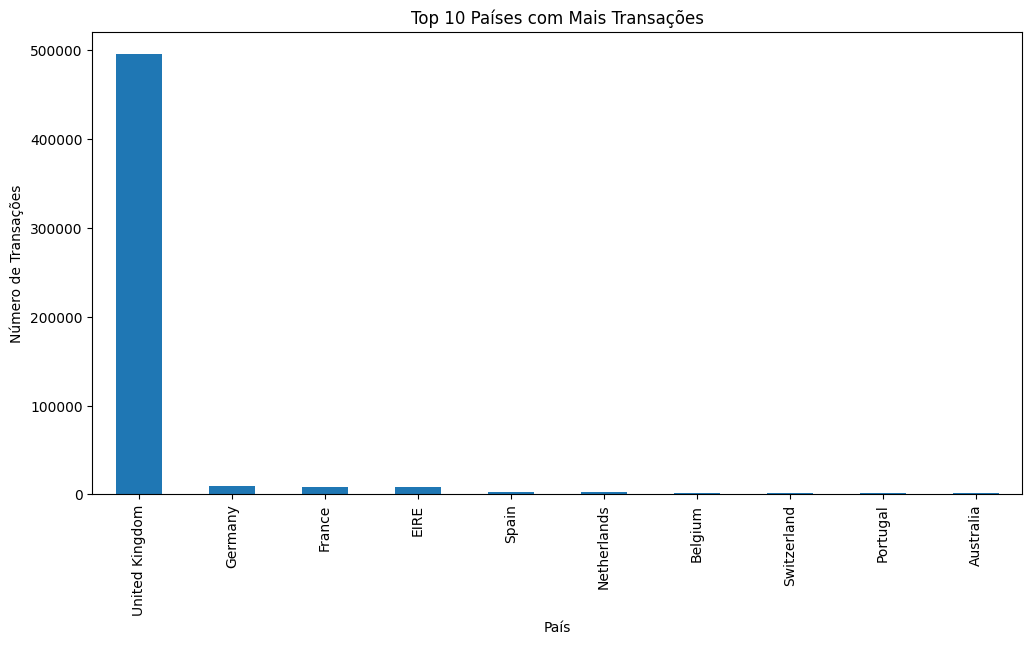

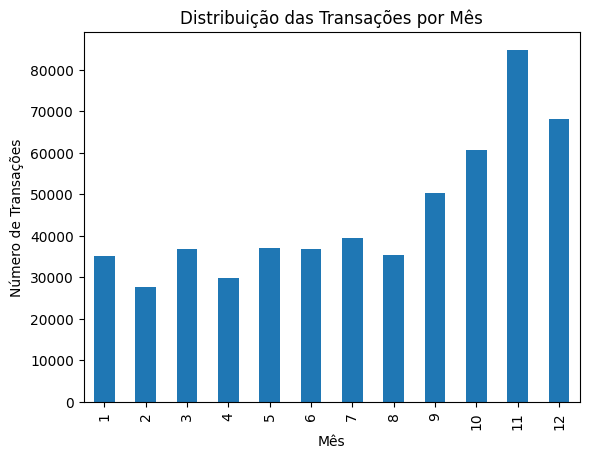

In [ ]:
# Contagem de países
plt.figure(figsize=(12,6))
df['Country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Países com Mais Transações')
plt.xlabel('País')
plt.ylabel('Número de Transações')
plt.show()

# Conferir a distribuição temporal
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição das Transações por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Transações')
plt.show()

In [ ]:
# Verificar valores nulos
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# Verificar duplicatas
duplicados = df.duplicated().sum()
print(f"Número de registros duplicados: {duplicados}")

Número de registros duplicados: 5268


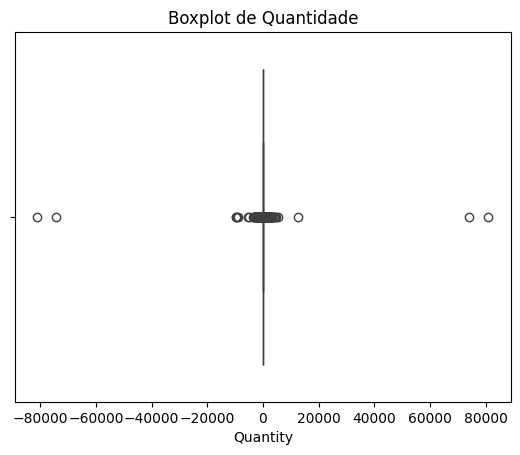

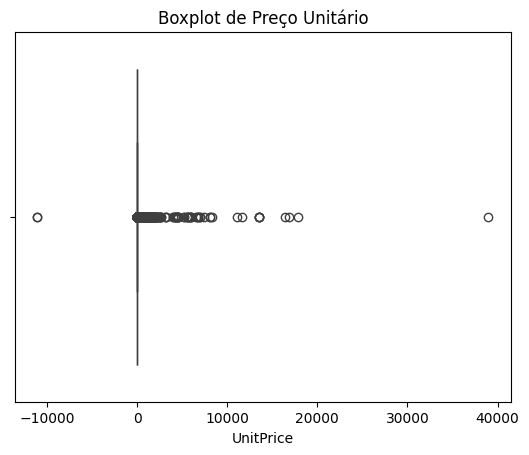

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     1

In [ ]:
# Identificando Outliers
# Boxplot de Quantity
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot de Quantidade')
plt.show()

# Boxplot de UnitPrice
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot de Preço Unitário')
plt.show()

# Verificar valores negativos
print(df[(df['Quantity'] <= 0) | (df['UnitPrice'] <= 0)])

In [ ]:
# Forçar remoção de NaN em CustomerID
df1 = df[~df['CustomerID'].isnull()]

# Verificar novamente
print(f"Shape após: {df1.shape}")

Shape após: (406829, 8)


In [ ]:
# Preencher com 'Unknown'
df1.loc[:, 'Description'] = df1['Description'].fillna('Unknown')

In [ ]:
# Número antes
antes = df1.shape[0]

# Remover duplicatas
df1 = df1.drop_duplicates()

# Número depois
depois = df1.shape[0]

print(f"Número de registros removidos: {antes - depois}")
print(f"Número de registros finais: {depois}")

Número de registros removidos: 0
Número de registros finais: 333234


In [ ]:
# Remover registros com Quantity <= 0
df1 = df1[df1['Quantity'] > 0]

# Remover registros com UnitPrice <= 0
df1 = df1[df1['UnitPrice'] > 0]

print(f"Shape após remoção de quantidades e preços não plausíveis: {df1.shape}")

Shape após remoção de quantidades e preços não plausíveis: (397884, 8)


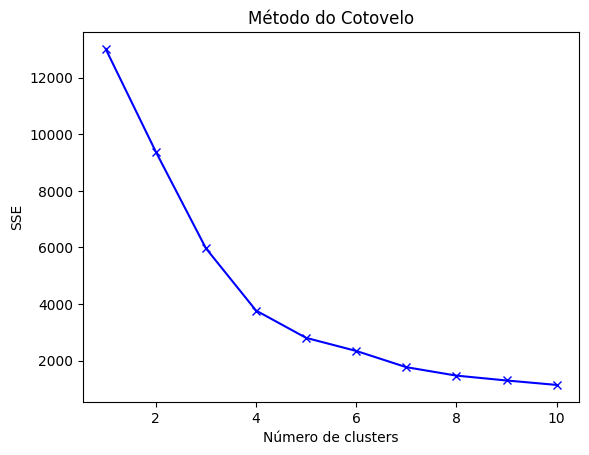

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

data_ref = df1['InvoiceDate'].max() + pd.Timedelta(days=1)

clientes = df1.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (data_ref - x.max()).days,
    'InvoiceNo': 'nunique',
    'UnitPrice': 'mean',
    'Quantity': 'sum'
})

clientes.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency'}, inplace=True)

# Monetary = preço médio * quantidade total comprada
clientes['Monetary'] = clientes['UnitPrice'] * clientes['Quantity']

# Elimina colunas intermediárias se quiser
clientes = clientes[['Recency', 'Frequency', 'Monetary']]

# 1. Seleciona as features
features = ['Recency', 'Frequency', 'Monetary']
X_raw = clientes[features]

# 2. Padroniza os dados
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

# 3. Método do cotovelo para definir k
sse = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(K, sse, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método do Cotovelo')
plt.show()


Interpretação do Gráfico do Cotovelo

Pelo gráfico fornecido, observamos que:
- O SSE (Soma dos Quadrados das Distâncias) diminui conforme aumentamos o número de clusters
- O "cotovelo" (ponto onde a diminuição do SSE começa a se estabilizar) parece estar em torno de 4 ou 5 clusters
- Isso sugere que 4 ou 5 clusters seriam uma escolha adequada para segmentar os clientes

Perfil dos Clusters (considerando 5 clusters como exemplo)

Embora não possamos ver os centros dos clusters no gráfico, com base em análises RFM típicas, podemos inferir os seguintes perfis:

1. Cluster 1 (Clientes Premium):
   - Baixa recência (compram recentemente)
   - Alta frequência (compram com frequência)
   - Alto valor monetário (gastam muito por compra)
   - Ação sugerida: Programas de fidelização exclusivos, ofertas personalizadas de alto valor

2. Cluster 2 (Clientes em Risco):
   - Alta recência (não compram há algum tempo)
   - Frequência média/alta no passado
   - Valor monetário médio/alto
   - Ação sugerida: Campanhas de recuperação com descontos especiais

3. Cluster 3 (Clientes Novos/Promissores):
   - Baixa recência
   - Baixa frequência (poucas compras)
   - Valor monetário variável
   - Ação sugerida: Programas de boas-vindas, incentivos para segunda compra

4. Cluster 4 (Clientes Ocasionais):
   - Recência média
   - Frequência baixa
   - Valor monetário médio/baixo
   - Ação sugerida: Campanhas sazonais, ofertas pontuais

5. Cluster 5 (Clientes Inativos):
   - Alta recência
   - Baixa frequência histórica
   - Baixo valor monetário
   - Ação sugerida: Reativação com ofertas agressivas ou foco reduzido

Utilidade para a Empresa

Esta análise é extremamente valiosa porque:

1. Segmentação Eficiente: Permite agrupar clientes com comportamentos similares para estratégias direcionadas
2. Otimização de Recursos: A empresa pode alocar melhor seu orçamento de marketing focando nos clusters mais lucrativos
3. Personalização: Campanhas podem ser adaptadas às necessidades específicas de cada grupo
4. Retenção: Identifica clientes em risco de churn para ações preventivas
5. Upselling: Identifica oportunidades para aumentar o valor gasto por cliente

Ações Recomendadas

1. Para Clientes Premium:
   - Programa VIP com benefícios exclusivos
   - Acesso antecipado a novos produtos
   - Presentes personalizados em datas comemorativas

2. Para Clientes em Risco:
   - Pesquisa de satisfação para entender motivos do afastamento
   - Ofertas de "nós sentimos sua falta" com descontos
   - Recompensas por retornar

3. Para Clientes Novos:
   - Sequência de e-mails de boas-vindas
   - Cupom para segunda compra
   - Tutorial sobre benefícios da fidelidade

4. Para Clientes Ocasionais:
   - Campanhas em períodos específicos (como aniversários)
   - Ofertas baseadas em histórico de compras
   - Programa de recompensas por compras frequentes

5. Para Clientes Inativos:
   - Avaliar custo-benefício de campanhas de reativação
   - Pesquisar motivos do abandono
   - Considerar remoção de base de marketing ativo se não for rentável

Esta segmentação permite que a empresa maximize o ROI de suas campanhas de marketing, oferecendo a mensagem certa, para o cliente certo, no momento certo.